This project seeks to find the relationship between home equity and home mortgage rates. All the data is from FRED. 

In [1]:
import numpy as np
import statsmodels.api as sm
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from numpy import NaN

In [2]:
df = pd.read_excel('Research Master Sheet Data.xlsx')
print(df)

    observation_date  Home_Equity  30YearMortgageRate  Home_Equity Loans  \
0         1990-01-01     4763.366           10.131538          53.104708   
1         1990-04-01     4741.736           10.323846          55.743285   
2         1990-07-01     4739.653           10.103077          58.867308   
3         1990-10-01     4681.928            9.959231          62.421854   
4         1991-01-01     4683.787            9.500769          65.042162   
5         1991-04-01     4661.038            9.522308          67.314769   
6         1991-07-01     4669.567            9.273077          68.939438   
7         1991-10-01     4681.724            8.690000          71.092215   
8         1992-01-01     4737.793            8.688462          72.294838   
9         1992-04-01     4737.797            8.677692          73.186831   
10        1992-07-01     4768.661            8.017692          74.078029   
11        1992-10-01     4802.662            8.192143          74.864354   
12        19

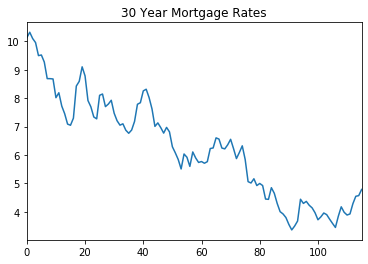

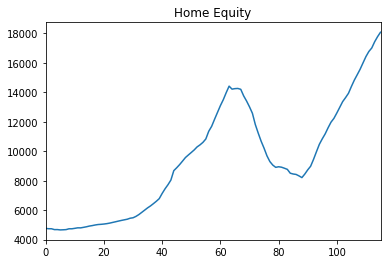

In [3]:
plt.figure(1)
df['30YearMortgageRate'].plot()
plt.title('30 Year Mortgage Rates')
plt.show()
plt.figure(2)
df['Home_Equity'].plot()
plt.title('Home Equity')
plt.show()

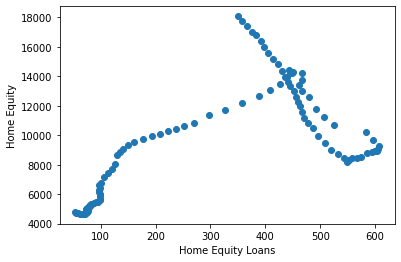

In [4]:
x1 = df['Home_Equity Loans']
x2 = df['30YearMortgageRate']
y = df['Home_Equity']
plt.scatter(x1,y)
plt.xlabel('Home Equity Loans')
plt.ylabel('Home Equity')
plt.show()

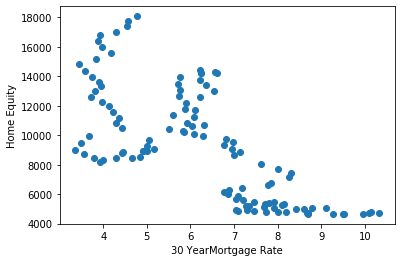

In [5]:
plt.scatter(x2,y)
plt.xlabel('30 YearMortgage Rate')
plt.ylabel('Home Equity')
plt.show()

In [6]:
import statsmodels.api as sm

In [7]:
reg1 = sm.OLS(endog=y, exog=x1, missing='drop')
ols_results=reg1.fit()


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Home_Equity   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              560.5
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                    5.00e-46
Time:                        14:14:04   Log-Likelihood:                         -1131.5
No. Observations:                 116   AIC:                                      2265.
Df Residuals:                     115   BIC:                                      2268.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [8]:
reg2 = sm.OLS(endog=y, exog=x2, missing='drop')
ols_results=reg2.fit()


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Home_Equity   R-squared (uncentered):                   0.669
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              232.5
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                    2.19e-29
Time:                        14:14:04   Log-Likelihood:                         -1170.1
No. Observations:                 116   AIC:                                      2342.
Df Residuals:                     115   BIC:                                      2345.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [9]:
reg3 = sm.OLS(endog=y, exog=df[['Home_Equity Loans','30YearMortgageRate']], missing='drop')
ols_results=reg3.fit()


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Home_Equity   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              543.2
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                    5.25e-59
Time:                        14:14:04   Log-Likelihood:                         -1097.7
No. Observations:                 116   AIC:                                      2199.
Df Residuals:                     114   BIC:                                      2205.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [10]:
reg4 = sm.OLS(endog=y, exog=df[['30YearMortgageRate','Housing_Inflation']], missing='drop')
ols_results=reg4.fit()


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Home_Equity   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1325.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                    1.20e-79
Time:                        14:14:04   Log-Likelihood:                         -1049.3
No. Observations:                 116   AIC:                                      2103.
Df Residuals:                     114   BIC:                                      2108.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [11]:
df['Lead_Home_Equity'] = df['Home_Equity'].shift(-1)
df = df[np.isfinite(df['Lead_Home_Equity'])]
df.head()

,observation_date,Home_Equity,30YearMortgageRate,Home_Equity Loans,Housing_Inflation,Lead_Home_Equity
0,1990-01-01,4763.366,10.131538,53.104708,126.266667,4741.736
1,1990-04-01,4741.736,10.323846,55.743285,127.400000,4739.653
2,1990-07-01,4739.653,10.103077,58.867308,129.966667,4681.928
3,1990-10-01,4681.928,9.959231,62.421854,130.500000,4683.787
4,1991-01-01,4683.787,9.500769,65.042162,132.266667,4661.038


This step adds a moves Lead_Home Equity up a period to make the row its in one period ahead of the Independent variables it is measuring. 

In [12]:
reg5 = sm.OLS(endog=df['Lead_Home_Equity'], exog=df[['Home_Equity Loans','Housing_Inflation']], missing='drop')
ols_results=reg5.fit()


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Lead_Home_Equity   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1056.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                    7.62e-74
Time:                        14:14:04   Log-Likelihood:                         -1052.6
No. Observations:                 115   AIC:                                      2109.
Df Residuals:                     113   BIC:                                      2115.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [13]:
reg6 = sm.OLS(endog=df['Lead_Home_Equity'], exog=df[['30YearMortgageRate','Housing_Inflation']], missing='drop')
ols_results=reg6.fit()


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Lead_Home_Equity   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1308.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                    7.39e-79
Time:                        14:14:04   Log-Likelihood:                         -1040.9
No. Observations:                 115   AIC:                                      2086.
Df Residuals:                     113   BIC:                                      2091.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [14]:
reg7 = sm.OLS(endog=df['Lead_Home_Equity'], exog=df[['Home_Equity Loans','Housing_Inflation']], missing='drop')
ols_results=reg7.fit()


print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Lead_Home_Equity   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1056.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                    7.62e-74
Time:                        14:16:08   Log-Likelihood:                         -1052.6
No. Observations:                 115   AIC:                                      2109.
Df Residuals:                     113   BIC:                                      2115.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The lag barely changes anything.